In [3]:
from PIL import Image

data_aug_gen = ImageDataGenerator(rescale=1. / 255,
                                 rotation_range=30,
                                 width_shift_range=0.1,
                                 height_shift_range=0.1
                                 shear_range=0.5
                                 zoom_range=[0.8, 2.0],
                                 horizontal_flip=True,
                                 vertical_flip=True,
                                 fill_mode='nearest')

img = load_img(fname)
x = img_to_array(img)
x = x.reshape((1,) + x.shape)

i = 0
save_to_dir = fname.split("\\")[4] + "/" + fname.split("\\")[5]
if not save_to_dir == "C:\\Users\\kimkm\\광고":
    for batch in data_aug_gen.flow(x, batch_size = 1, save_to_dir=save_to_dir, save_prefix='plus_'+str(file_name_freq),
                                  save_format='jpg')
    
    i += 1
    if i > 10:
        break

In [4]:
#본 코드 시작

from PIL import Image
import glob, sys, numpy as np
from sklearn.model_selection import train_test_split
from  keras.utils import np_utils

img_dir = 'C:\\Users\\kimkm\\광고'
categories = ['ad', 'non-ad']
np_classes = len(categories)

image_w = 64
image_h = 64


pixel = image_h * image_w * 3 # RGB 값

X = []
y = []

for idx, ad in enumerate(categories):
    img_dir_detail = img_dir + "\\" + ad
    files = glob.glob(img_dir_detail+"/*.jpg")


    for i, f in enumerate(files):
        try:
            img = Image.open(f)
            img = img.convert("RGB")
            img = img.resize((image_w, image_h))
            data = np.asarray(img)
            #Y는 0 아니면 1이니까 idx값으로 넣는다.
            X.append(data)
            y.append(idx)
            #if i % 300 == 0:
            print(ad, " : ", f)
        except:
            print(ad, str(i)+" 번째에서 에러 ")
X = np.array(X)
Y = np.array(y)


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

xy = (X_train, X_test, Y_train, Y_test)
#np.save("C:\\Users\\kimkm\\Desktop\\캡스톤 디자인\\데이터 수집\\광고\\binary_image_data.npy", xy)
np.save("C:\\Users\\kimkm\\광고\\numpy_data\\binary_image_data.npy", xy)

Using TensorFlow backend.


ad  :  C:\Users\kimkm\광고\ad\14674_685444_4.jpg
ad  :  C:\Users\kimkm\광고\ad\1569487488596_6.jpg
ad  :  C:\Users\kimkm\광고\ad\1608703704176.jpg
ad  :  C:\Users\kimkm\광고\ad\1608703999105.jpg
ad  :  C:\Users\kimkm\광고\ad\ad1.jpg
ad  :  C:\Users\kimkm\광고\ad\ad10.jpg
ad  :  C:\Users\kimkm\광고\ad\ad100.jpg
ad  :  C:\Users\kimkm\광고\ad\ad101.jpg
ad  :  C:\Users\kimkm\광고\ad\ad102.jpg
ad  :  C:\Users\kimkm\광고\ad\ad103.jpg
ad  :  C:\Users\kimkm\광고\ad\ad104.jpg
ad  :  C:\Users\kimkm\광고\ad\ad105.jpg
ad  :  C:\Users\kimkm\광고\ad\ad106.jpg
ad  :  C:\Users\kimkm\광고\ad\ad107.jpg
ad  :  C:\Users\kimkm\광고\ad\ad108.jpg
ad  :  C:\Users\kimkm\광고\ad\ad109.jpg
ad  :  C:\Users\kimkm\광고\ad\ad11.jpg
ad  :  C:\Users\kimkm\광고\ad\ad110.jpg
ad  :  C:\Users\kimkm\광고\ad\ad111.jpg
ad  :  C:\Users\kimkm\광고\ad\ad112.jpg
ad  :  C:\Users\kimkm\광고\ad\ad113.jpg
ad  :  C:\Users\kimkm\광고\ad\ad114.jpg
ad  :  C:\Users\kimkm\광고\ad\ad115.jpg
ad  :  C:\Users\kimkm\광고\ad\ad116.jpg
ad  :  C:\Users\kimkm\광고\ad\ad117.jpg
ad  :  C:\Users\kim

D:\anaconda3\lib\site-packages\numpy\core\_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
import keras.backend.tensorflow_backend as K

#X_train, X_test, y_train, y_test = np.load("C:\\Users\\kimkm\\Desktop\\캡스톤 디자인\\데이터 수집\\광고\\binary_image_data.npy", allow_pickle=True)
X_train, X_test, y_train, y_test = np.load("C:\\Users\\kimkm\\광고\\numpy_data\\binary_image_data.npy", allow_pickle=True)

print(X_train.shape)
print(X_train.shape[0])
print(np.bincount(y_train))
print(np.bincount(y_test))

(416, 64, 64, 3)
416
[219 197]
[58 47]


In [7]:
import os

image_w = 64
image_h = 64
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255


with K.tf_ops.device('/device:GPU:0'):
    model = Sequential()
    
    model.add(Conv2D(32, (3,3), padding="same", input_shape=X_train.shape[1:], activation="relu"))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(32, (3,3), padding="same", activation="relu"))
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    model.add(Conv2D(64, (3,3), padding="same", activation="relu"))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3,3), padding="same", activation="relu")) 
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(256, activation="relu"))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation="sigmoid"))
    
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    model_dir = 'C:\\Users\\kimkm\\광고\\model'
    if not os.path.exists(model_dir):
        os.mkdir(model_dir)
    model_path = model_dir + "\\ad_non_ad_classify.model"
    
    checkpoint = ModelCheckpoint(filepath=model_path, monitor='val_loss', verbose=1, save_best_only=True)
    #early_stopping = EarlyStopping(monitor='val_loss', patience=7)
    #model.save('C:\\Users\\kimkm\\광고\\model\\ad_non_ad_classify.model.h5')

In [8]:
# VGG 16 모델

# import os

# image_w = 64
# image_h = 64
# X_train = X_train.astype('float32') / 255
# X_test = X_test.astype('float32') / 255


# with K.tf_ops.device('/device:GPU:0'):
#     model = Sequential()
    
#     model.add(Conv2D(32, (3,3), padding="same", input_shape=X_train.shape[1:], activation="relu"))
#     model.add(BatchNormalization())

#     model.add(Conv2D(64, (3,3), padding="same", activation="relu"))
#     model.add(BatchNormalization())
#     model.add(MaxPooling2D(pool_size=(2,2)))
#     model.add(Dropout(0.25))
    
#     model.add(Conv2D(64, (3,3), padding="same", activation="relu"))
#     model.add(BatchNormalization())
#     model.add(MaxPooling2D(pool_size=(2,2)))
#     model.add(Dropout(0.25))
    
#     model.add(Conv2D(128, (3,3), padding="same", activation="relu"))
#     model.add(BatchNormalization())
#     model.add(MaxPooling2D(pool_size=(2,2)))
#     model.add(Dropout(0.25))
    
#     model.add(Conv2D(128, (3,3), padding="same", activation="relu"))
#     model.add(BatchNormalization())
#     model.add(MaxPooling2D(pool_size=(2,2)))
#     model.add(Dropout(0.25))
    
#     model.add(Flatten())
#     model.add(Dense(256, activation="relu"))
#     model.add(Dropout(0.5))
#     model.add(Dense(1, activation="sigmoid"))
    
#     #adam = tf.keras.optimizers.Adam(lr = 0.001)
#     model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
#     model_dir = 'C:\\Users\\kimkm\\광고\\model'
#     if not os.path.exists(model_dir):
#         os.mkdir(model_dir)
#     model_path = model_dir + "\\ad_non_ad_classify.model"
    
#     #checkpoint = ModelCheckpoint(filepath=model_path, monitor='val_loss', verbose=1, save_best_only=True)
#     #early_stopping = EarlyStopping(monitor='val_loss', patience=7)  # 깊은 학습에는 early stopping이 필요 없음
    
#     model.save('C:\\Users\\kimkm\\광고\\model\\ad_non_ad_classify.model.h5')


In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
dropout (Dropout)            (None, 8, 8, 64)          0

In [10]:
#history = model.fit(X_train, y_train, batch_size=64, epochs=100, validation_split=0.2, callbacks=[checkpoint, early_stopping])
history = model.fit(X_train, y_train, batch_size=64, epochs=100, validation_split=0.2, callbacks=[checkpoint])

Epoch 1/100
5/6 [========================>.....] - ETA: 0s - loss: 0.6965 - accuracy: 0.5312
Epoch 00001: val_loss improved from inf to 0.68825, saving model to C:\Users\kimkm\광고\model\ad_non_ad_classify.model
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: C:\Users\kimkm\광고\model\ad_non_ad_classify.model\assets
6/6 [==============================] - 3s 518ms/step - loss: 0.6949 - accuracy: 0.5331 - val_loss: 0.6883 - val_accuracy: 0.6429
Epoch 2/100
5/6 [========================>.....] - ETA: 0s - loss: 0.6824 - accuracy: 0.5656
Epoch 00002: val_loss improved from 0.68825 to 0.67143, saving model to C:\Users\kimkm\광고\model\ad_non_ad_classify.model
INFO:tensorflow:Assets written to: C:\Users\kimkm\광고\model\ad_non_ad_classify.model\assets
6/6 [==============================] - 2s 413ms/step - loss: 0.6825 - accuracy: 0.5693 - val_loss: 0.6714 - val_accuracy: 0.5595
Epoch 3/100
5/6 [========================>.....] - ETA:

In [18]:
print("정확도 : %.2f " %(model.evaluate(X_test, y_test, batch_size = 64)[1]))

2/2 [==============================] - 0s 11ms/step - loss: 0.4547 - accuracy: 0.7810
정확도 : 0.78 


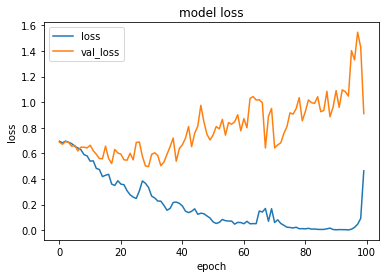

In [12]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'val_loss'], loc='upper left')
plt.show()

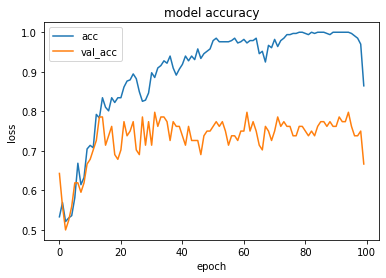

In [13]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['acc', 'val_acc'], loc='upper left')
plt.show()

In [14]:
from PIL import Image
#import Image
import os, glob, numpy as np
from tensorflow.keras.models import load_model

import tensorflow as tf

seed = 5
tf.random.set_seed(seed)
np.random.seed(seed)

caltech_dir = 'C:\\Users\\kimkm\\광고\\test'


image_w = 64
image_h = 64

pixels = image_h * image_w * 3

X = []
filenames = []
files = glob.glob(caltech_dir+"/*.jpg")
for i, f in enumerate(files):
    img = Image.open(f)
    img = img.convert("RGB")
    img = img.resize((image_w, image_h))
    data = np.asarray(img)

    filenames.append(f)
    X.append(data)
    
X = np.array(X)
X = X.astype(float) / 255

model = load_model('C:\\Users\\kimkm\\광고\\model\\ad_non_ad_classify.model')
#model = load_model('C:\\Users\\kimkm\\광고\\model\\ad_non_ad_classify.model.h5')


prediction = model.predict(X)
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)}) # 소수점 3자리까지
cnt = 0
for i in prediction:
    if i >= 0.5: print("해당 " + filenames[cnt].split("\\")[4] + filenames[cnt].split("\\")[5] + "  이미지는 광고 로 추정됩니다.")
    else : print("해당 " + filenames[cnt].split("\\")[4] + filenames[cnt].split("\\")[5] + "  이미지는 비광고 로 추정됩니다.")
    cnt += 1

해당 test1.jpg  이미지는 광고 로 추정됩니다.
해당 test2.jpg  이미지는 비광고 로 추정됩니다.
해당 test3.jpg  이미지는 비광고 로 추정됩니다.
해당 test4.jpg  이미지는 광고 로 추정됩니다.
해당 test5.jpg  이미지는 광고 로 추정됩니다.
해당 test6.jpg  이미지는 비광고 로 추정됩니다.
해당 test7.jpg  이미지는 비광고 로 추정됩니다.
해당 test8.jpg  이미지는 비광고 로 추정됩니다.
해당 test9.jpg  이미지는 비광고 로 추정됩니다.
